# Data Analysis (v1, 05/11/20)
Data Analysis<br>
Anders Jensen and Kaela Olsen<br>


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import spearmanr

In [2]:
import spotipy as sp
from spotipy.oauth2 import SpotifyClientCredentials
from collections import Counter

%env SPOTIPY_CLIENT_ID = 3543bc68b7a64fa4896cb0c1d2499e33
%env SPOTIPY_CLIENT_SECRET = b711f5fe2e9a417c89247f7036c9c069

sp = sp.Spotify(client_credentials_manager=SpotifyClientCredentials())

env: SPOTIPY_CLIENT_ID=3543bc68b7a64fa4896cb0c1d2499e33
env: SPOTIPY_CLIENT_SECRET=b711f5fe2e9a417c89247f7036c9c069


In [3]:
tracks = pd.read_csv("tracks_list.csv")

In [4]:
tracks_count = tracks.sort_values(by=['count'], ascending=False)
tracks_count.head()

,Unnamed: 0,uri,count,name,release_date,popularity,explicit,danceability,energy,key,...,instrumentalness,liveness,valence,tempo,type,id,track_href,analysis_url,duration_ms,time_signature
119,221,spotify:track:127QTOFJsJQp5LbJbu3A1y,176,Toosie Slide,2020-04-03,99,True,0.834,0.454,1,...,0.000006,0.1140,0.837,81.618,audio_features,127QTOFJsJQp5LbJbu3A1y,https://api.spotify.com/v1/tracks/127QTOFJsJQp...,https://api.spotify.com/v1/audio-analysis/127Q...,247059,4
146,259,spotify:track:1Cv1YLb4q0RzL6pybtaMLo,172,Sunday Best,2019-01-06,96,False,0.878,0.525,5,...,0.000000,0.0714,0.694,112.022,audio_features,1Cv1YLb4q0RzL6pybtaMLo,https://api.spotify.com/v1/tracks/1Cv1YLb4q0Rz...,https://api.spotify.com/v1/audio-analysis/1Cv1...,158571,4
1002,2564,spotify:track:7eJMfftS33KTjuF7lTsMCx,155,death bed (coffee for your head) (feat. beabad...,2020-02-08,99,False,0.726,0.431,8,...,0.000000,0.6960,0.348,144.026,audio_features,7eJMfftS33KTjuF7lTsMCx,https://api.spotify.com/v1/tracks/7eJMfftS33KT...,https://api.spotify.com/v1/audio-analysis/7eJM...,173333,4
116,218,spotify:track:6WrI0LAC5M1Rw2MnX2ZvEg,151,Don't Start Now,2019-10-31,97,False,0.794,0.793,11,...,0.000000,0.0952,0.677,123.941,audio_features,6WrI0LAC5M1Rw2MnX2ZvEg,https://api.spotify.com/v1/tracks/6WrI0LAC5M1R...,https://api.spotify.com/v1/audio-analysis/6WrI...,183290,4
1006,2569,spotify:track:0nbXyq5TXYPCO7pr3N8S4I,147,The Box,2019-12-06,99,True,0.896,0.586,10,...,0.000000,0.7900,0.642,116.971,audio_features,0nbXyq5TXYPCO7pr3N8S4I,https://api.spotify.com/v1/tracks/0nbXyq5TXYPC...,https://api.spotify.com/v1/audio-analysis/0nbX...,196653,4


As you can see, the top five songs of quarantine are 'Toosie Slide' by Drake, 'Sunday Best' by Surfaces, 'death bed' by Powfu and beabadoobee, 'Don't Start Now' by Dua Lipa, and 'The Box' by Roddy Rich. These five songs are all on the US Top 50 tracks charts list as of May 11th, 2020. It seems like the top songs of quarantine have more to do with what songs are trending and less to do with the emotional, physical, and mental circumstances of quarantine.
<br>
<br>
We wonder if this stays true for the rest of the songs, aside from the top 5 songs. Are the songs of quarantine just the songs of the time period of quarantine, or the songs of our emotional state in quarantine? Let's see what the top 20 look like.

In [5]:
tracks_count[:20]

,Unnamed: 0,uri,count,name,release_date,popularity,explicit,danceability,energy,key,...,instrumentalness,liveness,valence,tempo,type,id,track_href,analysis_url,duration_ms,time_signature
119,221,spotify:track:127QTOFJsJQp5LbJbu3A1y,176,Toosie Slide,2020-04-03,99,True,0.834,0.454,1,...,0.000006,0.1140,0.837,81.618,audio_features,127QTOFJsJQp5LbJbu3A1y,https://api.spotify.com/v1/tracks/127QTOFJsJQp...,https://api.spotify.com/v1/audio-analysis/127Q...,247059,4
146,259,spotify:track:1Cv1YLb4q0RzL6pybtaMLo,172,Sunday Best,2019-01-06,96,False,0.878,0.525,5,...,0.000000,0.0714,0.694,112.022,audio_features,1Cv1YLb4q0RzL6pybtaMLo,https://api.spotify.com/v1/tracks/1Cv1YLb4q0Rz...,https://api.spotify.com/v1/audio-analysis/1Cv1...,158571,4
1002,2564,spotify:track:7eJMfftS33KTjuF7lTsMCx,155,death bed (coffee for your head) (feat. beabad...,2020-02-08,99,False,0.726,0.431,8,...,0.000000,0.6960,0.348,144.026,audio_features,7eJMfftS33KTjuF7lTsMCx,https://api.spotify.com/v1/tracks/7eJMfftS33KT...,https://api.spotify.com/v1/audio-analysis/7eJM...,173333,4
116,218,spotify:track:6WrI0LAC5M1Rw2MnX2ZvEg,151,Don't Start Now,2019-10-31,97,False,0.794,0.793,11,...,0.000000,0.0952,0.677,123.941,audio_features,6WrI0LAC5M1Rw2MnX2ZvEg,https://api.spotify.com/v1/tracks/6WrI0LAC5M1R...,https://api.spotify.com/v1/audio-analysis/6WrI...,183290,4
1006,2569,spotify:track:0nbXyq5TXYPCO7pr3N8S4I,147,The Box,2019-12-06,99,True,0.896,0.586,10,...,0.000000,0.7900,0.642,116.971,audio_features,0nbXyq5TXYPCO7pr3N8S4I,https://api.spotify.com/v1/tracks/0nbXyq5TXYPC...,https://api.spotify.com/v1/audio-analysis/0nbX...,196653,4
1753,6284,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,139,Blinding Lights,2020-03-20,100,False,0.514,0.730,1,...,0.000095,0.0897,0.334,171.005,audio_features,0VjIjW4GlUZAMYd2vXMi3b,https://api.spotify.com/v1/tracks/0VjIjW4GlUZA...,https://api.spotify.com/v1/audio-analysis/0VjI...,200040,4
118,220,spotify:track:0sf12qNH5qcw8qpgymFOqD,136,Blinding Lights,2019-11-29,93,False,0.513,0.796,1,...,0.000209,0.0938,0.345,171.017,audio_features,0sf12qNH5qcw8qpgymFOqD,https://api.spotify.com/v1/tracks/0sf12qNH5qcw...,https://api.spotify.com/v1/audio-analysis/0sf1...,201573,4
144,257,spotify:track:3Dv1eDb0MEgF93GpLXlucZ,133,Say So,2019-11-07,97,True,0.787,0.673,11,...,0.000004,0.0904,0.786,110.962,audio_features,3Dv1eDb0MEgF93GpLXlucZ,https://api.spotify.com/v1/tracks/3Dv1eDb0MEgF...,https://api.spotify.com/v1/audio-analysis/3Dv1...,237893,4
846,1723,spotify:track:6K4t31amVTZDgR3sKmwUJJ,132,The Less I Know The Better,2015-07-17,86,True,0.640,0.740,4,...,0.006780,0.1670,0.785,116.879,audio_features,6K4t31amVTZDgR3sKmwUJJ,https://api.spotify.com/v1/tracks/6K4t31amVTZD...,https://api.spotify.com/v1/audio-analysis/6K4t...,216320,4
433,809,spotify:track:4nK5YrxbMGZstTLbvj6Gxw,130,Supalonely,2019-11-15,95,True,0.863,0.631,7,...,0.000030,0.1230,0.817,128.977,audio_features,4nK5YrxbMGZstTLbvj6Gxw,https://api.spotify.com/v1/tracks/4nK5YrxbMGZs...,https://api.spotify.com/v1/audio-analysis/4nK5...,223480,4


On May 11th, the only songs in the top 20 of our data set that weren't on the US Top 50 list were "Toxic", 'Tongue Tied' and 'U Can't Touch This'. However, every other song was on the US Top 50 list. It is interesting to note the disproportional popularity of "Toxic" and "U Can't Touch This." Both songs are very fitting for the Coronavirus pandemic, and the enforced social distancing and self-quarantine because of it.

**Is there a way to write a function that compares the top 20 (or even top 50) of this list and the top 50 in the US? I think we could do this... we would just need to know how to scrape the Spotify US Top 50 playlist.** 

In [6]:
tracks_2019 = []
uri = 'spotify:playlist:37i9dQZF1DXcz8eC5kMSWZ'
    
length = sp.playlist_tracks(uri)['total']
playlist_data = sp.playlist_tracks(uri, limit=50)

for k in playlist_data['items']:
    tracks_2019.append(k['track']["uri"])

In [7]:
len(tracks_2019)

50

In [8]:
df_2019 = pd.DataFrame.from_dict(Counter(tracks_2019), orient='index').reset_index().rename(columns={"index":"uri", 0:"count"})

In [10]:
df_2019.to_csv("top50_2019.csv")

In [9]:
def filter_data(x):
    data = sp.track(x['uri'])
    #sets data variable for each track
    
    name = data['name']
    pop = data['popularity']
    date = data['album']['release_date']
    explic = data['explicit']
    
    features = sp.audio_features(x['uri'])
    #uses spotify function to access audio features
    
    return {**x, 
            "name" : name, 
            'release_date': date, 
            "popularity" : pop,
            'explicit' : explic, 
            **features[0]}

In [11]:
final_2019 = df_2019.apply(lambda x: filter_data(x), axis=1, result_type='expand')

In [81]:
final_2019

,uri,count,name,release_date,popularity,explicit,danceability,energy,key,loudness,...,instrumentalness,liveness,valence,tempo,type,id,track_href,analysis_url,duration_ms,time_signature
0,spotify:track:6v3KW9xbzN5yKLt9YKDYA2,1,Señorita,2019-06-19,84,False,0.759,0.548,9,-6.049,...,0.000000,0.0828,0.749,116.967,audio_features,6v3KW9xbzN5yKLt9YKDYA2,https://api.spotify.com/v1/tracks/6v3KW9xbzN5y...,https://api.spotify.com/v1/audio-analysis/6v3K...,190800,4
1,spotify:track:2Fxmhks0bxGSBdJ92vM42m,1,bad guy,2019-03-29,92,False,0.701,0.425,7,-10.965,...,0.130000,0.1000,0.562,135.128,audio_features,2Fxmhks0bxGSBdJ92vM42m,https://api.spotify.com/v1/tracks/2Fxmhks0bxGS...,https://api.spotify.com/v1/audio-analysis/2Fxm...,194088,4
2,spotify:track:0RiRZpuVRbi7oqRdSMwhQY,1,Sunflower - Spider-Man: Into the Spider-Verse,2019-09-06,84,False,0.755,0.522,2,-4.368,...,0.000000,0.0685,0.925,89.960,audio_features,0RiRZpuVRbi7oqRdSMwhQY,https://api.spotify.com/v1/tracks/0RiRZpuVRbi7...,https://api.spotify.com/v1/audio-analysis/0RiR...,157560,4
3,spotify:track:6ocbgoVGwYJhOv1GgI9NsF,1,7 rings,2019-02-08,87,True,0.778,0.317,1,-10.732,...,0.000000,0.0881,0.327,140.048,audio_features,6ocbgoVGwYJhOv1GgI9NsF,https://api.spotify.com/v1/tracks/6ocbgoVGwYJh...,https://api.spotify.com/v1/audio-analysis/6ocb...,178627,4
4,spotify:track:2YpeDb67231RjR0MgVLzsG,1,Old Town Road - Remix,2019-06-21,86,False,0.878,0.619,6,-5.560,...,0.000000,0.1130,0.639,136.041,audio_features,2YpeDb67231RjR0MgVLzsG,https://api.spotify.com/v1/tracks/2YpeDb67231R...,https://api.spotify.com/v1/audio-analysis/2Ype...,157067,4
5,spotify:track:0hVXuCcriWRGvwMV1r5Yn9,1,I Don't Care (with Justin Bieber),2019-07-12,81,False,0.798,0.675,6,-5.041,...,0.000000,0.0894,0.842,101.956,audio_features,0hVXuCcriWRGvwMV1r5Yn9,https://api.spotify.com/v1/tracks/0hVXuCcriWRG...,https://api.spotify.com/v1/audio-analysis/0hVX...,219947,4
6,spotify:track:7xQAfvXzm3AkraOtGPWIZg,1,Wow.,2019-09-06,86,True,0.829,0.539,11,-7.359,...,0.000002,0.1030,0.388,99.960,audio_features,7xQAfvXzm3AkraOtGPWIZg,https://api.spotify.com/v1/tracks/7xQAfvXzm3Ak...,https://api.spotify.com/v1/audio-analysis/7xQA...,149547,4
7,spotify:track:7qEHsqek33rTcFNT9PFqLf,1,Someone You Loved,2019-05-17,92,False,0.501,0.405,1,-5.679,...,0.000000,0.1050,0.446,109.891,audio_features,7qEHsqek33rTcFNT9PFqLf,https://api.spotify.com/v1/tracks/7qEHsqek33rT...,https://api.spotify.com/v1/audio-analysis/7qEH...,182161,4
8,spotify:track:5w9c2J52mkdntKOmRLeM2m,1,Con Calma,2019-01-24,83,False,0.737,0.860,8,-2.652,...,0.000002,0.0574,0.656,93.989,audio_features,5w9c2J52mkdntKOmRLeM2m,https://api.spotify.com/v1/tracks/5w9c2J52mkdn...,https://api.spotify.com/v1/audio-analysis/5w9c...,193227,4
9,spotify:track:2VxeLyX666F8uXCJ0dZF8B,1,Shallow,2018-10-05,86,False,0.572,0.385,7,-6.362,...,0.000000,0.2310,0.323,95.799,audio_features,2VxeLyX666F8uXCJ0dZF8B,https://api.spotify.com/v1/tracks/2VxeLyX666F8...,https://api.spotify.com/v1/audio-analysis/2Vxe...,215733,4


In [13]:
print("As seen below, there are 50 songs in this data set with 23 columns used to describe each song")
shape = final_2019.shape
print("Shape: " +str(shape))

As seen below, there are 50 songs in this data set with 23 columns used to describe each song
Shape: (50, 23)


In [14]:
final_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 23 columns):
uri                 50 non-null object
count               50 non-null int64
name                50 non-null object
release_date        50 non-null object
popularity          50 non-null int64
explicit            50 non-null bool
danceability        50 non-null float64
energy              50 non-null float64
key                 50 non-null int64
loudness            50 non-null float64
mode                50 non-null int64
speechiness         50 non-null float64
acousticness        50 non-null float64
instrumentalness    50 non-null float64
liveness            50 non-null float64
valence             50 non-null float64
tempo               50 non-null float64
type                50 non-null object
id                  50 non-null object
track_href          50 non-null object
analysis_url        50 non-null object
duration_ms         50 non-null int64
time_signature      50 non-null int64

In [15]:
final_2019.describe()

,count,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,50.0,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.0
mean,1.0,81.440000,0.719400,0.60462,5.280000,-6.229000,0.580000,0.127582,0.299381,0.006039,0.132792,0.490460,120.425700,201691.620000,4.0
std,0.0,10.392619,0.130358,0.16975,3.295266,2.725249,0.498569,0.103008,0.255321,0.029065,0.074088,0.219144,28.740856,44213.177325,0.0
min,1.0,22.000000,0.351000,0.11100,0.000000,-14.505000,0.000000,0.029000,0.005130,0.000000,0.057400,0.120000,71.105000,113000.000000,4.0
25%,1.0,80.000000,0.657500,0.52000,2.000000,-7.056000,0.000000,0.053675,0.095900,0.000000,0.088425,0.330500,97.316000,175840.000000,4.0
50%,1.0,84.000000,0.743000,0.62400,5.000000,-5.759000,1.000000,0.081350,0.244000,0.000000,0.106000,0.495000,116.125500,193657.500000,4.0
75%,1.0,86.000000,0.814500,0.73225,8.000000,-4.295250,1.000000,0.199000,0.449250,0.000003,0.141250,0.637000,137.478750,215372.250000,4.0
max,1.0,93.000000,0.907000,0.90400,11.000000,-2.652000,1.000000,0.375000,0.978000,0.162000,0.437000,0.952000,179.974000,354320.000000,4.0


In [16]:
final_2019.columns

Index(['uri', 'count', 'name', 'release_date', 'popularity', 'explicit',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature'],
      dtype='object')

To start, let's look at some characteristics of 2019's biggest hits.

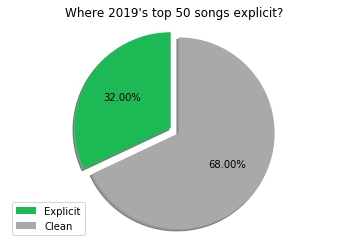

In [17]:

sizes = [16, 34]
explode = (0, 0.1) 

fig1, ax1 = plt.subplots()
colors = ['#1DB954', 'darkgrey']
ax1.pie(sizes, explode=explode, autopct='%1.2f%%', colors = colors,
shadow=True, startangle=90)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(labels, loc="best")
plt.title("Where 2019's top 50 songs explicit?")
plt.show()

How about what key the songs were in? The "Key" audio feature uses pitch class notation. For example, 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1. Let's see how 2019 turned out. 

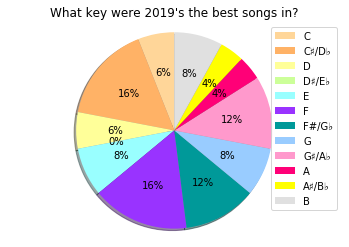

In [18]:
labels = 'C', 'C♯/D♭', 'D', 'D♯/E♭', 'E', 'F', 'F#/G♭', 'G', 'G♯/A♭', 'A', 'A♯/B♭', 'B'
sizes = [3, 8, 3, 0, 4, 8, 6, 4, 6, 2, 2, 4]
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0) 

fig1, ax1 = plt.subplots()
colors = ["#FFD699", "#FFB266", "#FFFF99", "#CCFF99", "#99FFFF", "#9933FF", "#009999", "#99CCFF", "#FF99CC", "#FF0077", "#FFFF00", "#E0E0E0", "#999FF"]
ax1.pie(sizes, explode=explode, colors = colors, autopct='%1.0f%%',
shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(labels, loc="best")
plt.title("What key were 2019's the best songs in?")
plt.show()


This pie chart illustrates a few things. First, the most popular Key's were C♯/D♭ and F, accounting for 8 of the 50 songs each.
Further, the only key not represented was D♯/E♭; all other 11 keys were represented. All this being said, the somewhat even distribution of the chart indicates that the key of a song does not have a <em> dramatic </em> effect on the song's success. Stay away from D# though, it's trash. (Kaela has a playlist literally called "Vibes in D#")

More than key, songs have a modality associated with them. A song in a "major" key is more joyous while a "minor" key creates tension to be resolved. Let's take a look at the chart.

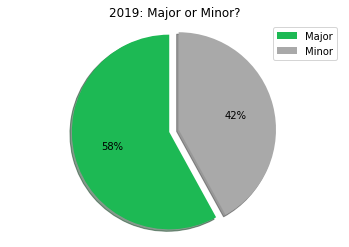

In [19]:
labels = 'Major', 'Minor'
sizes = [29, 21]
explode = (0.1, 0) 

fig1, ax1 = plt.subplots()
colors = ['#1DB954', 'darkgrey']
ax1.pie(sizes, explode=explode,  autopct='%1.0f%%', colors = colors,
shadow=True, startangle=90)
plt.legend(labels, loc="best")
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("2019: Major or Minor?")
plt.show()

Similair to key, not a huge disparity illustrated, but songs with a major mode were still made the top charts more often. 

When did these songs come out? 

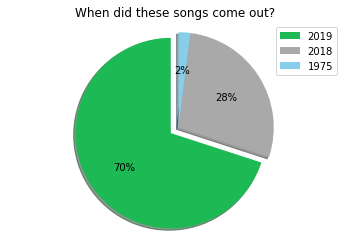

In [20]:
labels = '2019', '2018', '1975'
sizes = [35, 14, 1]
explode = (0.1, 0, 0) 

fig1, ax1 = plt.subplots()
colors = ['#1DB954', 'darkgrey', 'skyblue']
ax1.pie(sizes, explode=explode, autopct='%1.0f%%', colors = colors,
shadow=True, startangle=90)
plt.legend(labels, loc="best")
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("When did these songs come out?")
plt.show()

As one might expect, Release year plays a large role on a songs popularity. Only 30% of the top 50 songs splilled over from the year before. One might be wondering, what song from 1975 is still crushing the top charts? A remastering of "Bohemian Rhapsody" by the British rock band Queen. 

Now let's analyze some other specific columns in detail, quantifying and illustrating the trends. Three quantifiable audio features that are easy ot compare are Energy, Danceability and Valence. Spotify measures each on a scale of 0.0 to 1.0, so they can be graphed alongside eachother without manipulating scale. 

According to Spotify's WEB API reference guide the Energy of a song "represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy." 

Likewise, a song's Danceability "describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity."

Finally, a song's valence score is "describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)."

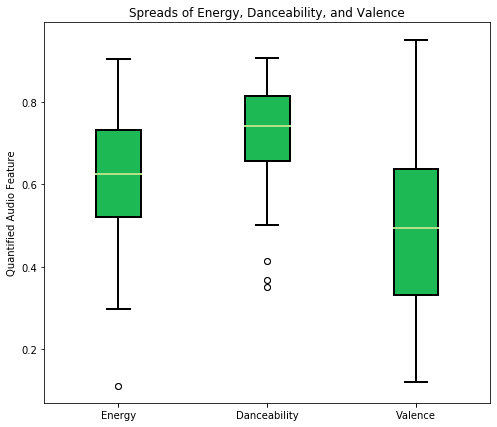

In [21]:
data_to_plot = final_2019['energy'], final_2019['danceability'], final_2019['valence']

# Create a figure instance
fig = plt.figure(1, figsize=(8, 7))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data_to_plot)

## to get fill color
bp = ax.boxplot(data_to_plot, patch_artist=True)

## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='black', linewidth=2)
    # change fill color
    box.set( facecolor = '#1DB954' )

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='black', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='black', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)
    
ax.set_xticklabels(['Energy', 'Danceability', 'Valence'])

    
plt.title("Spreads of Energy, Danceability, and Valence")
plt.ylabel("Quantified Audio Feature")
plt.show()

How about instruments and vocals? Two good measures of these characteristics are <em> acousticness</em>  and <em> speechiness.</em> <br>

According to Spotify's WEB API reference table, speechiness is a confidence measure from 0.0 to 1.0 of whether the track is acoustic (where 1.0 indicates a certainty that the track is accoustic). 

Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording, the closer to 1.0 the attribute value. For instance, values above 0.66 describe tracks that are probably made entirely of spoken words, like rap music. 

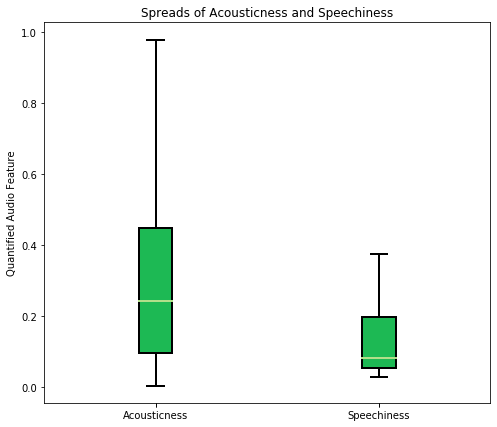

In [22]:
data_to_plot = final_2019['acousticness'], final_2019['speechiness']

fig = plt.figure(1, figsize=(8, 7))
ax = fig.add_subplot(111)
bp = ax.boxplot(data_to_plot)
bp = ax.boxplot(data_to_plot, patch_artist=True)
for box in bp['boxes']:
    box.set( color='black', linewidth=2)
    box.set( facecolor = '#1DB954' )
for whisker in bp['whiskers']:
    whisker.set(color='black', linewidth=2)
for cap in bp['caps']:
    cap.set(color='black', linewidth=2)
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)
ax.set_xticklabels(['Acousticness', 'Speechiness'])
plt.title("Spreads of Acousticness and Speechiness")
plt.ylabel("Quantified Audio Feature")
plt.show()

Finally, we can look at a song's tempo. In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. It is measured in beats per minute (BPM). 

In [23]:
# Potentially, realign all scales of all audio features to lineup. 

Let's break down each of these audio features individually to get exact summary statistics.


NOTE for Kaela: Since there are no counts in this section, i can't run correlations, intercept, rank, rsqaure ect. on these values. 

However, the biggest comparison is literally the median of each vs the median in quarantine. 

In [24]:
def summary_stats(feature):
    mean = feature.mean()
    median = feature.median() 
    variance = feature.var()
    std = feature.std()
    print("Mean: " +str(round(mean,4)))
    print("Median: " +str(round(median,4)))
    print("Variance: " +str(round(variance,4)))
    print("Standard Deviation: " +str(round(std,4)))

In [25]:
print("2019's Energy Statistics:")
summary_stats(final_2019['energy'])
print("")

print("2019's Danceability Statistics:")
summary_stats(final_2019['danceability'])
print("")

print("2019's Valence Statistics:")
summary_stats(final_2019['valence'])
print("")

print("2019's Acousticness Statistics:")
summary_stats(final_2019['acousticness'])
print("")

print("2019's Speechiness Statistics:")
summary_stats(final_2019['speechiness'])
print("")

print("2019's Popularity Statistics:")
summary_stats(final_2019['popularity'])
print("")

print("2019's Tempo Statistics:")
summary_stats(final_2019['tempo'])
print("")

2019's Energy Statistics:
Mean: 0.6046
Median: 0.624
Variance: 0.0288
Standard Deviation: 0.1698

2019's Danceability Statistics:
Mean: 0.7194
Median: 0.743
Variance: 0.017
Standard Deviation: 0.1304

2019's Valence Statistics:
Mean: 0.4905
Median: 0.495
Variance: 0.048
Standard Deviation: 0.2191

2019's Acousticness Statistics:
Mean: 0.2994
Median: 0.244
Variance: 0.0652
Standard Deviation: 0.2553

2019's Speechiness Statistics:
Mean: 0.1276
Median: 0.0814
Variance: 0.0106
Standard Deviation: 0.103

2019's Popularity Statistics:
Mean: 81.44
Median: 84.0
Variance: 108.0065
Standard Deviation: 10.3926

2019's Tempo Statistics:
Mean: 120.4257
Median: 116.1255
Variance: 826.0368
Standard Deviation: 28.7409



---
---
WE NEED TO ORDER AND TRANSITIONS THE SECTIONS BETWEEN 2019 and 2020(Quarantine). 

I am using this as a section break.

I think the best way to do this is to first introduce both, then analyze 2019 first, then quarantine, the put them together. 

---
---

So now, we want to know if the music we listen to during quarantine, or the songs we consider "quarantine songs" according to the playlists we make for them, are selected more as a result of their popularity or of actual quarantine. Thankfully, Spotify gives us a metric to measure popularity.

So to answer this question, we will see if there is a correlation between a track's popularity level, and the number of times they appear in a quarantine playlist.

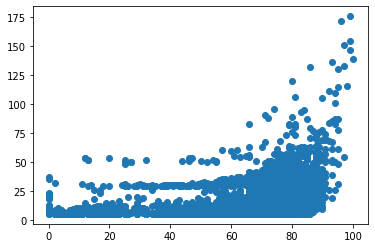

In [26]:
plt.scatter(tracks['popularity'], tracks['count'])
plt.show()

There seems to be a clear positive relationship with these two variables. However, it doesn't seem exactly linear. We are interested in understanding the strength of correlation between these two variables. We'll use a variant called rank correlation, where each element of a vector has a rank.  

Rank correlation (or Spearman correlation) is very similar to regular correlation (also called Pearson correlation), but it is more robust to relationships that aren't linear. Pearson correlation is to rank correlation as mean is to median. In both cases we can replace the actual value in an array with its *rank* in the array. The median is the value that has the mean rank (ie the midpoint), while the rank correlation is the Pearson correlation between the rank of $X_i$ and the rank of $Y_i$.

The following code defines datapoints that nearly lie on a line and calculates the slope of a regression line fit to the data.

In [27]:
linear_model = LinearRegression().fit(tracks[['popularity']], tracks[['count']])
print("Linear model slope:", round(float(linear_model.coef_[0]),4))

Linear model slope: 0.2205


Now let's see the correlation of:
1. the track counts and the track popularity
2. the *ranks* of the track counts and the *ranks* of the tracks popularity

In [28]:
corrcoef = np.corrcoef(tracks['popularity'], tracks['count'])[0][1]
rank_corrcoef = np.corrcoef(tracks['popularity'].rank(), tracks['count'].rank())[0][1]
print('Correlation:', round(corrcoef, 4))
print('Correlation of ranks:', round(rank_corrcoef,4))
spearman_r = spearmanr(tracks['popularity'], tracks['count'])
print('Spearman r: {:.4f}'.format(spearman_r.correlation))

Correlation: 0.2644
Correlation of ranks: 0.4717
Spearman r: 0.4717


As we can see, the correlation of ranks is much higher than the linear correlation.

It would be useful to understand the overall appearances of each song. We can use basic stats to help us understand this.

In [29]:
tracks['count'].describe()

count    8944.000000
mean       11.926431
std        11.723794
min         5.000000
25%         6.000000
50%         8.000000
75%        13.000000
max       176.000000
Name: count, dtype: float64

The most appearances a song has is 176, and the least, a minimum imposed by our datascraping filter, is 5. The average number of playlist appearances was 11.9, with a standard deviation of 11.7. 25% of the songs fell below 6 appearances, 50% fell below 8 appearances, and 75% fell below 13 appearances. This means the appearances are skewed extremely left, and that the top 25% songs are spread between 13 appearances and 176 appearances.

Let's visualize this with a histogram.

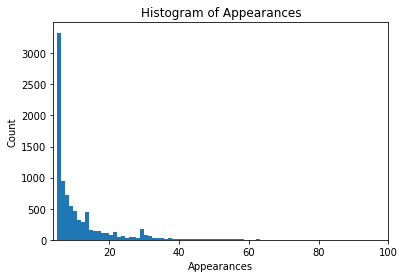

In [30]:
plt.hist(tracks['count'], bins=150)
plt.title('Histogram of Appearances')
plt.ylabel('Count')
plt.xlabel('Appearances')
plt.xlim(4,100)
plt.show()

Clearly, there's a massive spike at when the Appearances = 5. Let's see how it looks after zooming in a little...

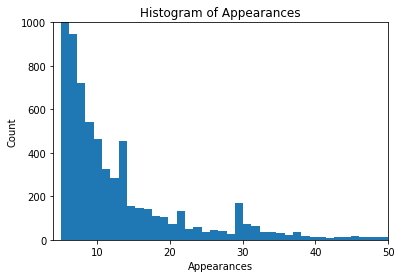

In [31]:
plt.hist(tracks['count'], bins=150)
plt.title('Histogram of Appearances')
plt.ylabel('Count')
plt.xlabel('Appearances')
plt.xlim(4,50)
plt.ylim(0,1000)
plt.show()

This begs the question, are the top 25% songs appearing the most because of their relevance to quarantine or their overall popularity?

Before analyzing the audio features our data, let's seperate the songs into two groups:

 - The top 25% of songs (based on count) - a dataset of 2100 songs
 - The top 50 songs that appeared the most - a dataset of 50 songs
 
Subsequently, comparison to 2019 top 50s songs can be made.

In [32]:
quarantine_top_50 = tracks[tracks['count']>69]

In [33]:
top_25_percent = tracks[tracks['count']>13]

Starting with explicity, key, and mode, we get the following illustrations:

In [34]:
# count = 0
# for value in top_25_percent['explicit']:
#     if top_25_percent['explicit'] is False:
#         count = count + 1
        
# print(count)

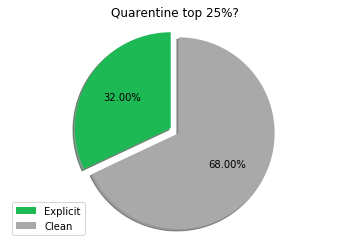

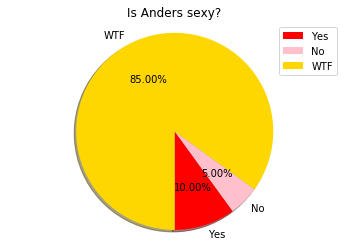

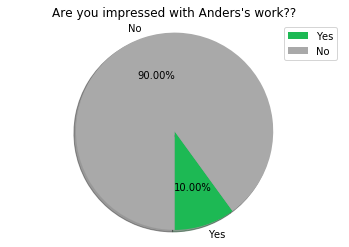

In [62]:
labels = 'Explicit', 'Clean'
sizes = [16, 34]
explode = (0, 0.1) 

fig1, ax1 = plt.subplots()
colors = ['#1DB954', 'darkgrey']
ax1.pie(sizes, explode=explode, autopct='%1.2f%%', colors = colors,
shadow=True, startangle=90)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(labels, loc="best")
plt.title("Quarentine top 25%?")
plt.show()



labels = 'Yes', 'No', 'WTF'
sizes = [10, 5, 85]
colors = ['red', 'pink', 'gold']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, autopct='%1.2f%%', colors = colors, labels = labels,
shadow=True, startangle=270)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(labels, loc="best")
plt.title("Is Anders sexy?")
plt.show()


labels = 'Yes', 'No'
sizes = [10, 90] 

fig1, ax1 = plt.subplots()
colors = ['#1DB954', 'darkgrey']
ax1.pie(sizes, autopct='%1.2f%%', colors = colors, labels = labels,
shadow=True, startangle=270)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(labels, loc="best")
plt.title("Are you impressed with Anders's work??")
plt.show()

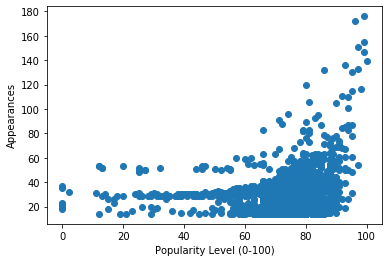

In [36]:
plt.scatter(top_25_percent['popularity'], top_25_percent['count'])
plt.xlabel('Popularity Level (0-100)')
plt.ylabel('Appearances')
plt.show()

Now that we've narrowed down our data set a little, let's see if we have stronger correlations between the two variables.

In [37]:
corrcoef = np.corrcoef(top_25_percent['popularity'], top_25_percent['count'])[0][1]
rank_corrcoef = np.corrcoef(top_25_percent['popularity'].rank(), top_25_percent['count'].rank())[0][1]
spearman_r = spearmanr(top_25_percent['popularity'], top_25_percent['count'])
print('Correlation: {:.4f}'.format(corrcoef))
print('Correlation of ranks: {:.4f}'.format(rank_corrcoef))
print('Spearman r: {:.4f}'.format(spearman_r.correlation))

Correlation: 0.1380
Correlation of ranks: 0.1445
Spearman r: 0.1445


Popularity doesn't seem like the most indicative factor in a song's number of appearances. Let's try a different variable, like song year. Maybe the most played songs will be ones that are recently released and thus trending right now.

Spotify gives us the variable 'release date' as the full day, so we have to filter it down to the year. We did this by creating a new colummn called 'release_year'.

In [38]:
pd.options.mode.chained_assignment = None

In [39]:
# for x in range(len(tracks['release_date'])):
#     tracks['release_year'][x] = int(tracks['release_date'][x][:4])

In [40]:
# plt.hist(tracks['release_year'], bins=150)
# plt.title('Histogram of Song Years')
# plt.ylabel('Count')
# plt.xlabel('Year')
# plt.xticks()
# plt.show()

As we can see, the songs are most commonly from the year 2019, but not 2020. This makes sense that most songs were from 2019, as since we are only a third of the way into the 2020, we can expect to have less songs from 2020. However, given the fact that we are only about a third (when this dataset was taken) into 2020, its interesting to note that the 2020 count is more than half as large as the 2019 count.

## Audio Analysis
We could compare the audio features of each song, using the Top Tracks of 2019 playlist (and/or Top Tracks of Jan 2020, Feb 2020) as a baseline. It is a small sample of what we listened to before quarantine.

Use box plots to compare the main audio features of the Top 2019 songs, and the Top 100 songs of our dataset (and/or the Top 25% of our dataset).

#### Valence

#### Danceability

#### Tempo

#### Speechiness

In [41]:
def audio_features(feature):

    x = top_25_percent[[feature]]
    y = top_25_percent[['count']]
    
    model = LinearRegression().fit(x, y)
    m = float(model.coef_)
    b = float(model.intercept_)
    r2 = float(model.score(x, y))

    plt.scatter(x,y,marker = 'x', color = 'red')
    plt.plot(x, m*x + b)
    plt.title('Understanding the Top 25%: '+feature)
    plt.xlabel(list(x)[0])
    plt.ylabel(list(y)[0])
    plt.show()
    
    model = LinearRegression().fit(x, y)
    r2 = float(model.score(x, y))

    print("slope: ", round(float(model.coef_),4))
    print("intercept: ", round(float(model.intercept_), 4))
    print("r-squared: ", round(r2, 4))
    print("")

In [42]:
def corr_compare(feature):
    corrcoef = np.corrcoef(tracks[feature], tracks['count'])[0][1]
    rank_corrcoef = np.corrcoef(tracks[feature].rank(), tracks['count'].rank())[0][1]
    spearman_r = spearmanr(tracks[feature], tracks['count'])
    print('Correlation:', round(corrcoef, 4))
    print('Correlation of ranks:', round(rank_corrcoef,4))
    print('Spearman r: {:.4f}'.format(spearman_r.correlation))

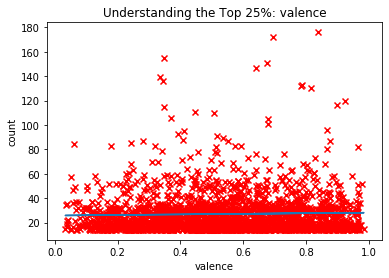

slope:  2.3927
intercept:  25.7532
r-squared:  0.0011

Correlation: 0.0331
Correlation of ranks: 0.03
Spearman r: 0.0300


In [43]:
audio_features('valence')
corr_compare('valence')

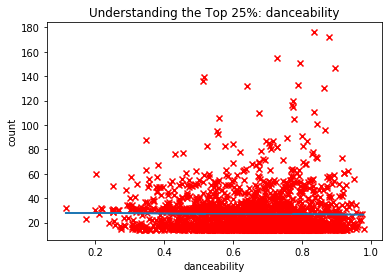

slope:  -1.5495
intercept:  28.062
r-squared:  0.0002

Correlation: 0.001
Correlation of ranks: 0.0172
Spearman r: 0.0172


In [44]:
audio_features('danceability')
corr_compare('danceability')

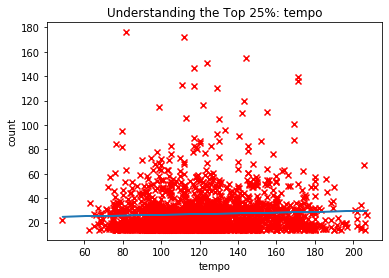

slope:  0.0303
intercept:  23.3463
r-squared:  0.0026

Correlation: 0.0432
Correlation of ranks: 0.0338
Spearman r: 0.0338


In [45]:
audio_features('tempo')
corr_compare('tempo')

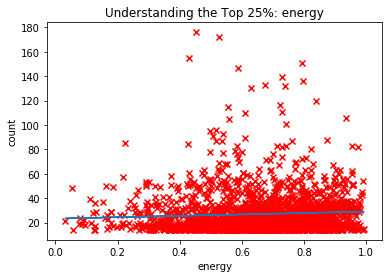

slope:  5.7856
intercept:  23.2215
r-squared:  0.0042

Correlation: 0.0692
Correlation of ranks: 0.0537
Spearman r: 0.0537


In [46]:
audio_features('energy')
corr_compare('energy')

<h1> COMPARISON SECTION </h1>

<p> Needs some formatting and descriptions </p>

In [47]:
def box_plot_comparisons(feature):
    x = quarantine_top_50[feature]
    y = final_2019[feature]
    data_to_plot = x, y
    fig = plt.figure(1, figsize=(8, 7))
    ax = fig.add_subplot(111)
    bp = ax.boxplot(data_to_plot)
    bp = ax.boxplot(data_to_plot, patch_artist=True)
    for box in bp['boxes']:
        box.set( color='black', linewidth=2)
        box.set( facecolor = '#1DB954' )
    for whisker in bp['whiskers']:
        whisker.set(color='black', linewidth=2)
    for cap in bp['caps']:
        cap.set(color='black', linewidth=2)
    for median in bp['medians']:
        median.set(color='#b2df8a', linewidth=2)
    for flier in bp['fliers']:
        flier.set(marker='o', color='#e7298a', alpha=0.5)
    ax.set_xticklabels(['Quarantine top 50', '2019 Top 50'])
    plt.title(feature + ": Quarantine vs. 2019")
    plt.ylabel("Scale")
    plt.show()
    

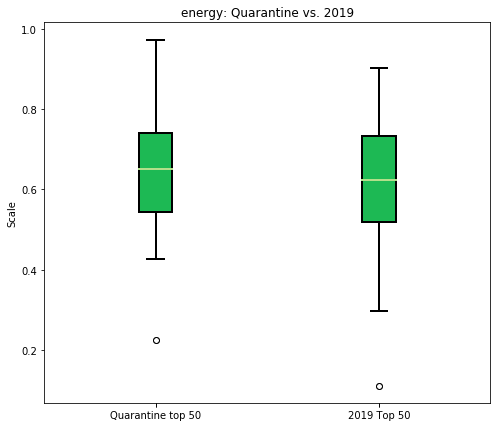

In [63]:
box_plot_comparisons('energy')

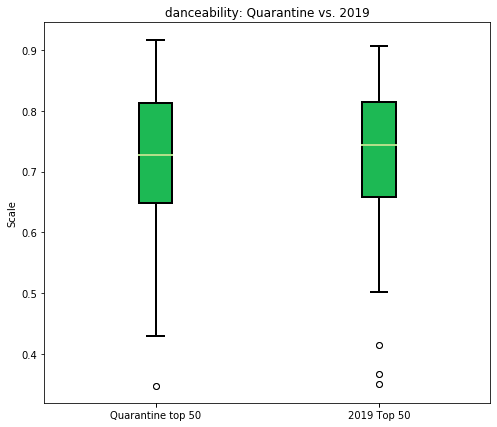

In [64]:
box_plot_comparisons('danceability')

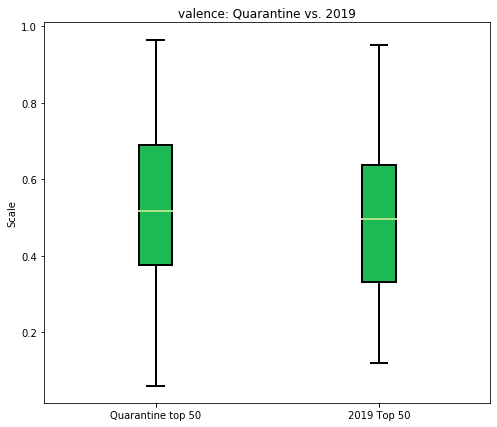

In [65]:
box_plot_comparisons('valence')

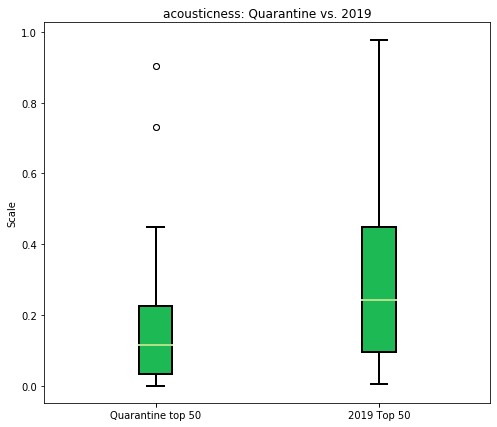

In [66]:
box_plot_comparisons('acousticness')

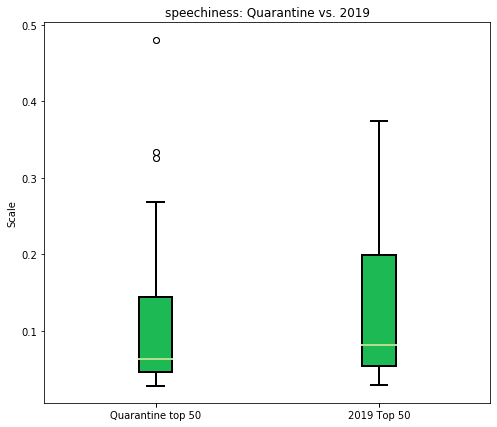

In [67]:
box_plot_comparisons('speechiness')

Other Ideas to Brainstorm:

Analysis of more explicit: 

Use Binomial or Geometric Models

Use the Poisson model


---
---
<h2> Potential Analysis to include from each Homework </h2>


<h4> HW 1 </h4>

This homework doesn't have much to offer, it was mainly an introduction to plotting and loading csv files - not much to take except graph styling like: <br>
 <br><em>
    <font color='red'>Kk well thats just like kinda rude. Like, what did HW 1 ever do to you? Everything has something to offer in life. Graph styling is important too. Maybe its just misunderstood. Doesn't mean we just toss it out the window just like that like nothing ever happened. Like we didnt spend those special moments,  designing beautiful graphs bc of it. "nothing to offer". Smh. </font><font color='magenta'>You don't have to be such a <b>fucking narcissistic dick.</b></font> </em>
 <br> 
 <br> 
marker = 'x', color ='Red'


<h4> HW 2 -- DONE (used binomial stuff) </h4>

This section mostly includes probability simulations that aren't applicable, however, potentially could use the binomial or poisson distributions (in log form as below):

The goemetric distribution is defined as: <br>
$p(M) = \prod_{i=1}^n \binom{n}{x_i} p^{x_i}(1-p)^{n-x_i}$


Binomial Function to use: <br>

def binomial(x, n, p): <br>
<blockquote> return comb(n, x) * (p**x) * (1-p)**(n-x) </blockquote>


The log likelihood of a Poisson distribution, with rate parameters $\lambda$, is defined as: <br>
$LL(\lambda|x_{1:n}) = -n\lambda + \sum_{i=1}^n x_i\log(\lambda) - \log(x_i!)$

where $\prod_{i=1}^n$ means product from $i=1:n$.


Potential Log function to use:<br>


def poisson(c, w): 
    <blockquote> result = 0  
    for x in c:    
    result += (x*np.log(w) - ceil(lgamma(x+1))) <br>
    return result + (-(w) * len(c)) </blockquote>

<h4> HW 3 -- maybe? </h4>

This section was mainly about probability, the most important piece of information on this file is defined below:

$$\Pr \left[ A | B \right] = \frac{\Pr \left[ A \cap B \right]}{\Pr \left[ B \right]}$$

Our only potential in this section would be to somehow predict popularity based on the other factors, but there's too many variables. 



<h4> HW 4 -- use REGEX (we can't use geometric, not applicable)</h4>

This homework deals more with gemetric distributions, the simple equation is: 
$$ \Pr(X = k) = (1-p)^{k-1}p. $$   while the log likelihood version is :

$$ LL_{\rm geom}[p | x] = (x-1)\log(1-p)+\log(p)$$

funtion that takes x and p and returns probability: <br>
def geom_dist(x, p):
    <blockquote> prob = (((1-p)**(x-1))*(p))     </blockquote>
        <blockquote>return prob     </blockquote>


<font color = 'teal'>The rest of this Hw dealt with REGEX, not too applicable except a fun finish. <b> !! lets use regex in our code !!</b></font>

<h4> HW 5 </h4>

This homework dealt mostly with squared error for models: <b><font color = 'gold'> single-mean vs group-means </font> <font color = 'orange'> lets see if we can do something with this!!! like comparing against the averages for each variable </font></b>. We also used a function to see how many counts fell within a certain amount of standard deviations: 


def count_within_range(x, n_std):
    
    crit_check = (abs(x-x.mean()) <= n_std * x.std())
    success_count = crit_check.sum() # you can sum over a boolean vector to get the total number of True values
        # (since Trues are coded as 1s, and Falses are coded as 0s)
    success_prop = success_count/len(x)
    return round(success_prop, 3)
<h4> HW 6 -- use variance/covariance stuff </h4>

In this homework we worked on calculating variance, covariance, correlation, and (slope, intercept, and STD of residuals) <font color = 'green'> we could do more stuff with variance and covariance</font>

We also used sklearn.linear_model to train a linear regression that predicts (price) or count in our case, given that variable. -- DONE --

<h4> HW 7 -- k den</h4>

We've mostly covered hw 7 above.

<h4> HW 8 -- DONE </h4>

Only new concept was rank correlation, which we've used. 

I think this binomial function is the most clear: <font color = 'pink'> oh yea i wonder why u think its the most clear i wonder maybe its bc u fucking wrote it wow with the comb(n,k) and DIDDNT TELL ME TO INCLUDE IT. Nope. u just let me scroll right by it, keeping ur mouth shut, getting all the answers from the TA's JUST TO SABATOAGE MY FUCKING HW GRADE FOR THE TEN THOUSADNTH FUCKING TIME THANKF OR FUCKING NOTHING <b> ANDERS KNOX JENSEN </b></font>

#def binomial_distribution(n, p, k):
    #combination = (comb(n, k))
    #success = (p**k)
    #failure = ((1-p)**(n-k))
    #probability = combination * success * failure
    #return probability

<font color = 'lavendar'> Also, wasn't there that hw where you see how likey it is that your dataset/the correlation you  got was simply due to random chance or random variation by comparing it to something? Leaving this here to remind myself... </font>

In [49]:
# top2019songs = final_2019['name']
# topQsongs = tracks['name']

# for song in topQsongs:
#     if song is in top2019songs:
#         count+=1

### Binomial Discribution

In [50]:
# from scipy.special import factorial, comb

# def binomial(n, p, k):
#     return comb(n, k) * (p**k) * (1-p)**(n-k)

# def binomialsampling(n, p, k):
#     count = 0
#     for x in np.random.binomial(n, p, 10000):
#         if x > k:
#             count += 1
#     return count/10000

In [51]:
# top2019songs = final_2019['name']
# topQsongs = tracks['name']

# count = 0
# for song in top2019songs:
#     for i in range(len(topQsongs)):
#         if song in topQsongs[i]:
#             count+=1
            
# print("number of times the top 2019 songs appear in our quarantine songs dataset:", count)
# print("total quarantine songs: ", len(topQsongs))
# print(round(count/len(topQsongs),8))

We want to see if the songs of 2019 are in our quarantine songs. Maybe, that can show us that we are remaining some amount of similarity and sanity during our isolation. 

In this case, a "success" is the appearance of a 2019 song in our quarantine song dataset. We had 103 successes out of 8944, which is a probability of 0.0115161. So, the probability of success (of a top 2019 song appearing in our quarantine songs) is 0.0115161.

In [52]:
# print("What is the probability at least one song appears in the Quarantine songs?")
# print("")
# print("P(at least one) = 1 - P(none)")


# n = 100
# p = 0.0115161
# k = 0
# print("n =", n)
# print("")


# print("using distribution: ", 1-binomial(n, p, k))
# print("using sampling: ", binomialsampling(n, p, k))

In [80]:
count = 0
for i in tracks['explicit']:
    if i == True:
        count += 1
    
count

2747

In [68]:
tracks.loc['explicit']

KeyError: 'explicit'